In [1]:
##packages
import torch
import matplotlib.pyplot as plt
import math
import random

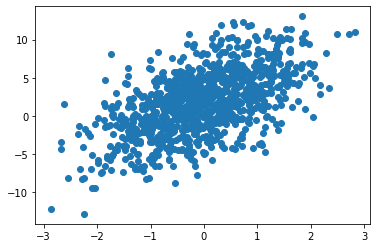

In [2]:
####generate data set
def data_gen(w,b,nums): #@save
    X=torch.normal(0,1,(nums,len(w)))
    y=torch.mm(X,w)+b
    y+=torch.normal(0,0.1,y.shape)
    return X,y

true_w=torch.tensor([2.5,3.5]).reshape(2,-1)
true_b=torch.tensor([2])

features,labels=data_gen(true_w,true_b,nums=1000)

plt.scatter(features[:,0],labels)

In [3]:
#generate batch
def gen_batch(labels,features,batchsize):
    nums=len(labels)
    index=list(range(0,nums))
    random.shuffle(index)
    for i in range(math.ceil(nums/batchsize)):
        batch_index=torch.tensor(index[i*batchsize:min((i+1)*batchsize,nums)])
        yield labels[batch_index],features[batch_index]
        
for y,X in gen_batch(labels,features,20):
    print(y,'\n',X)
    break

tensor([[ 1.3380],
        [ 3.9027],
        [ 6.5441],
        [ 4.2401],
        [10.7223],
        [ 3.5110],
        [ 1.4654],
        [-0.8777],
        [ 6.1443],
        [ 2.0157],
        [ 1.1114],
        [ 1.5108],
        [ 5.7111],
        [-1.4994],
        [ 3.8797],
        [ 3.3276],
        [ 5.0966],
        [-1.4153],
        [-3.4925],
        [ 5.5305]]) 
 tensor([[ 1.1413, -0.9879],
        [-0.5712,  0.9500],
        [ 0.4265,  0.9628],
        [ 1.2083, -0.2646],
        [ 2.4843,  0.7733],
        [-0.0062,  0.4145],
        [ 0.0056, -0.1688],
        [ 1.4455, -1.8125],
        [ 0.3163,  0.9956],
        [-1.3866,  1.0064],
        [-1.4189,  0.7539],
        [-0.9549,  0.5624],
        [-0.7655,  1.6143],
        [ 1.1391, -1.7760],
        [ 0.8383, -0.0853],
        [ 0.2663,  0.1999],
        [-0.7599,  1.4378],
        [-0.9895, -0.2395],
        [ 0.6151, -1.9723],
        [ 0.8962,  0.4016]])


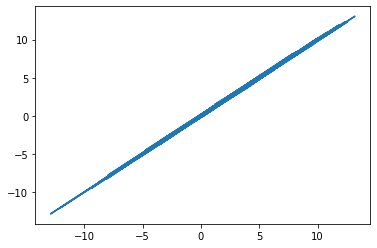

In [4]:
##linear model
def ling(X,w,b):
    return torch.mm(X,w)+b

plt.plot(ling(features,true_w,true_b),labels)

In [5]:
###loss function
def loss(labels,prediction):
    return (labels-prediction)**2/2

In [6]:
def sgd(params,lr,batchsize):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batchsize
            param.grad.zero_()

In [7]:
### train
lr=0.01
batchsize=10
epoch=7
w=torch.zeros((2,1),requires_grad=True)
b=torch.zeros((1,1),requires_grad=True)
for i in range(epoch):
    for label,feature in gen_batch(labels,features,batchsize):
        y=ling(feature,w,b)
        l=loss(label,y)
        l.sum().backward()
        sgd([w,b],lr,batchsize)
    with torch.no_grad():
        print(w,'\n',b)

tensor([[1.4468],
        [2.1428]], requires_grad=True) 
 tensor([[1.2068]], requires_grad=True)
tensor([[2.0568],
        [2.9744]], requires_grad=True) 
 tensor([[1.6832]], requires_grad=True)
tensor([[2.3131],
        [3.2975]], requires_grad=True) 
 tensor([[1.8718]], requires_grad=True)
tensor([[2.4204],
        [3.4229]], requires_grad=True) 
 tensor([[1.9483]], requires_grad=True)
tensor([[2.4663],
        [3.4730]], requires_grad=True) 
 tensor([[1.9785]], requires_grad=True)
tensor([[2.4851],
        [3.4915]], requires_grad=True) 
 tensor([[1.9908]], requires_grad=True)
tensor([[2.4931],
        [3.4982]], requires_grad=True) 
 tensor([[1.9958]], requires_grad=True)
